In [60]:
import pandas as pd
import numpy as np

In [61]:
miss_value = ['']
clientlist = pd.read_csv('2018 ABACUS CLIENTS.csv')
# clientlist = clientlist.dropna()
# clientlist

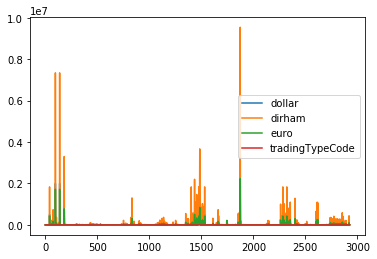

In [62]:
productlist = pd.read_csv('product.csv',na_values =miss_value )
# productlist = productlist.dropna()
# productlist
productlist.plot()

In [63]:
Colist = pd.read_excel('List of Companies.xlsx')
# Colist = Colist.dropna()
# Colist

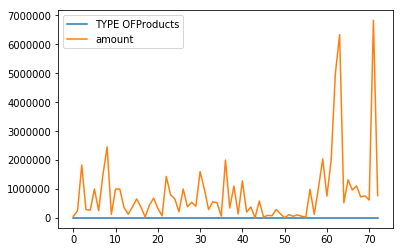

In [65]:
track = pd.read_excel('TRACK.xlsx')
track.plot()

In [66]:
def getBoldataframe(TradingCode, datalist):
    codeVector = []
    for procode in datalist['tradingTypeCode']:
        if procode ==TradingCode:
            codeVector.append(True)
        else:
            codeVector.append(False)

    return datalist[codeVector]

In [67]:
# Distangolishing rep.Exporter and exporter in tacking sheet.
repOrMainCo = [True if (('UAE' in str(x))or('uae' in str(x))or('U.A.E' in str(x))or('u.a.e' in str(x))) else False for x in track['country']]# All type of uae

def randomExporter(i, datalist):
    tradedataframe = getBoldataframe(i,datalist)
    r, _ = tradedataframe.shape
    count = np.floor(np.random.rand()*r)
    return str(datalist.loc[count,'companies']),str(datalist.loc[count,'country'])
repExporter = []
cityOfRepExporter = []
exporter = []
cityOfExporter = []
for i in range(len(repOrMainCo)):
    if repOrMainCo[i]:
        repExporter.append(str(track.loc[i, 'exporter/repExporter']).upper())
        cityOfRepExporter.append(str(track.loc[i, 'country']))
    else:
        repExporter.append('')
        cityOfRepExporter.append('')

    if not (repOrMainCo[i]):
        exporter.append(str(track.loc[i, 'exporter/repExporter']).upper())
        cityOfExporter.append(str(track.loc[i, 'country']))
    else:
        exp , cityExp = randomExporter(track.loc[i,'TYPE OFProducts'],Colist)
        exporter.append(exp)
        cityOfExporter.append(cityExp)


In [68]:
ones = {
    0: '', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', 6: 'Six',
    7: 'Seven', 8: 'Eight', 9: 'Nine', 10: 'Ten', 11: 'Eleven', 12: 'Twelve',
    13: 'Thirteen', 14: 'Fourteen', 15: 'Fifteen', 16: 'Sixteen',
    17: 'Seventeen', 18: 'Eighteen', 19: 'Nineteen'}
tens = {
    2: 'Twenty', 3: 'Thirty', 4: 'Forty', 5: 'Fifty', 6: 'Sixty',
    7: 'Seventy', 8: 'Eighty', 9: 'Ninety'}
illions = {
    1: 'Thousand', 2: 'Million', 3: 'Billion', 4: 'Trillion', 5: 'Quadrillion',
    6: 'Quintillion', 7: 'Sextillion', 8: 'Septillion', 9: 'Octillion',
    10: 'Nonillion', 11: 'Decillion'}

def say_number(i):
    """
    Convert an integer in to it's word representation.

    say_number(i: integer) -> string
    """
    if i < 0:
        return _join('Negative', _say_number_pos(-i))
    if i == 0:
        return 'Zero'
    return _say_number_pos(i)


def _say_number_pos(i):
    if i == 0:
        return ''
    if i < 1:
        return str(int(i*100)) + '/100'
    if i < 20:
        return _join(ones[int(i)],_say_number_pos(i % 1))
    if i < 100:
        return _join(_join(tens[i // 10], ones[int(i) % 10]),_say_number_pos(i % 1))
    if i < 1000:
        return _divide(i, 100, 'Hundred')
    for illions_number, illions_name in illions.items():
        if i < 1000**(illions_number + 1):
            break
    return _divide(i, 1000**illions_number, illions_name)


def _divide(dividend, divisor, magnitude):
    return _join(
        _say_number_pos(dividend // divisor),
        magnitude,
        _say_number_pos(dividend % divisor),
    )


def _join(*args):
    return ' '.join(filter(bool, args))

In [69]:
amountToWord = []
c = 0
for number in track['amount']:
    if str(track.loc[c,'currency']).lower() == 'euro':
        amountToWord.append(say_number(number) + ' Euros only')
    elif str(track.loc[c,'currency']).lower() == 'aed':
        amountToWord.append(say_number(number) + ' Dirhams only')
    elif str(track.loc[c,'currency']).lower() == 'pound':
        amountToWord.append(say_number(number) + ' Pound sterlings only')
    elif str(track.loc[c,'currency']).lower() == 'cad':
        amountToWord.append(say_number(number) + ' canadian Dollars only')
    elif str(track.loc[c,'currency']).lower() == 'usd':
        amountToWord.append(say_number(number) + ' U.S.Dollars only')
    c +=1

In [70]:
#,DIS1,QTY1,UNIT1,UNITPRICE1,TOTAL1,DIS2,QTY2,UNIT2,UNITPRICE2,TOTAL2
# businessType, REF, Date,IMPORTER,CTOFIM,REPPOFIM,CTOFREPOFIM,REPOFEXPORTER,CTOFREPOFEXPORTER,EXPORTER,CTOFEX,TOTALAMOUNT,Currency,INWORDS,ORIGIN,LO,DIS, amountInWord

importer = track['SOURCE COMPANY']
repImporter = track['COMPANY NAME']
cityOfImporter = track['SourceCo.City']
cityOfrepImporter = track['CO.City']

In [71]:
def lcs(X , Y): 
    # find the length of the strings 
    m = len(X) 
    n = len(Y) 
  
    # declaring the array for storing the dp values 
    L = [[None]*(n+1) for i in range(m+1)] 
  
    """Following steps build L[m+1][n+1] in bottom up fashion 
    Note: L[i][j] contains length of LCS of X[0..i-1] 
    and Y[0..j-1]"""
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0 : 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1]+1
            else: 
                L[i][j] = max(L[i-1][j] , L[i][j-1]) 
  
    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1] 
    return L[m][n] 
#end of function lcs 


In [72]:
def getClientRef(c, clientlist):
    num = str(clientlist.loc[c,'SR. NO.']) + '.'
    for char in clientlist.loc[c,'LIST OF COMPANY']:
        if char != '.':
            num = num + char
        else:
            break
    return num
    
def bestmatch(candid,clientlist):
    # Remove all bad charachters.
    candid = ''.join(e for e in candid if e.isalnum())
    c = 0
    maxAl = 0
    candidRow = []
    num = ''
    maxLCStoClient = 0
    for client in clientlist['LIST OF COMPANY']:
    #     print(client)
        candidLcs = lcs(candid.lower(), client.lower())
        LCStoClient = candidLcs / len(client)
#         print(candidLcs)
#         print(len(candid),candidLcs)
#         if candidLcs > maxAl:
#             match = c
#             maxAl = candidLcs
#             maxLCStoClient = LCStoClient
#         elif (candidLcs == maxAl) and (maxLCStoClient < LCStoClient):
#             match = c
#             maxAl = candidLcs
#             maxLCStoClient = LCStoClient                
                
#         print(len(candid),candidLcs)
        if (candidLcs == len(candid)):
            if (maxLCStoClient < LCStoClient):
                candidRow = list(clientlist.iloc[c])
                num = getClientRef(c, clientlist)
                maxLCStoClient = LCStoClient
#                 print(maxLCStoClient)
        c+=1


    return num, candidRow
bestmatch('ANA GENERAL TRADING LLC',clientlist)

('18.1',
 [18,
  'ANACO',
  '1. ANACO GENERAL TRADING LLC',
  'Dubai- United Arab Emirates',
  'SZ KETA TECHNOLOGY CO LTD - GUANDONG- CHINA',
  ' GUANDONG- CHINA'])

In [73]:
for i in range(len(exporter)):
    if (str(exporter[i]) == '') or (str(exporter[i]) == np.nan):
        exp , cityExp = randomExporter(track.loc[i,'TYPE OFProducts'],Colist)
        exporter[i] =  imp
        cityOfExporter[i] = cityImp

In [76]:
numlist = []
veclist = []
c = 0
for client in repExporter:
    num , vec = bestmatch(client,clientlist)
    numlist.append(num)
    veclist.append(vec)
    if num != '':
        cityOfRepExporter[c] = str(vec[3]).upper()
        print(cityOfRepExporter[c])
        exporter[c] = vec[4].upper()
        cityOfExporter[c] = vec[5]
    c += 1 


DUBAI- UNITED ARAB EMIRATES
RAS AL KHAIMAH- UNITED ARAB EMIRATES
RAS AL KHAIMAH- UNITED ARAB EMIRATES
NAN


AttributeError: 'float' object has no attribute 'upper'

In [ ]:
def QtyClassification(amount, mean):
    estQty = int(amount / mean)
    if (estQty < 30):
        return 1
    elif (estQty >= 30) and (estQty < 80):
        return np.ceil(np.random.randint(1,2,1))
    
    if (estQty >= 80) and (estQty < 150):
        return np.ceil(np.random.randint(2,3,1))
    
    elif (estQty >= 150) and (estQty < 300):
        return np.ceil(np.random.randint(2,4,1))
    
    elif (estQty >= 300) and (estQty < 600):
        return np.ceil(np.random.randint(3,4,1))

    elif (estQty >= 600) and (estQty <1000 ):
        return np.ceil(np.random.randint(4,5,1))

    elif (estQty > 1000 ):
        return 5    

In [ ]:
#Choosing products

def getRandomKProduct(amount,iD, datalist):
    tradedataframe = getBoldataframe(iD,datalist)
    codeVector = []
    # removing greater than amount
    for proAmount in tradedataframe['dollar']:
        if amount > proAmount:
            codeVector.append(True)
        else:
            codeVector.append(False)
    tradedataframe = tradedataframe[codeVector]
    #Computing mean value
    codeVector = []
    mean = np.mean(tradedataframe['dollar'])

    for proAmount in tradedataframe['dollar']:
        if (proAmount > mean/100) and proAmount < mean*100:
            codeVector.append(True)
        else:
            codeVector.append(False)
    
    r, _ = tradedataframe.shape

    tradedataframe = tradedataframe[codeVector]
    
    r, _ = tradedataframe.shape

    k = int(QtyClassification(amount , mean))

    produc = []
    if k < r:
        for i in range(k):
            count = np.random.randint(0,r-1,1)

            produc.append(list(tradedataframe.iloc[count[0]]))
            tradedataframe.drop(tradedataframe.index[count[0]], inplace=True)
            r, c = tradedataframe.shape

    else:
        produc =tradedataframe

    RandomKProduct = pd.DataFrame(produc)

    RandomKProduct.columns = ['p_name','unit','dollar','dirham','euro','type','tradingTypeCode']
    return RandomKProduct


In [ ]:
# print(np.random.randint(0,102,1))
# getRandomKProduct(3000000,1, productlist)

In [ ]:
def changeCurrency(i , data):
#     print(str(track.loc[i,'currency']).lower())
    
    if str(track.loc[i,'currency']).lower() == 'euro':

        return float(track.loc[i,'amount'] * 1.13)
    elif str(track.loc[i,'currency']).lower()[:] == 'aed':

        return float(track.loc[i,'amount'] * 0.27)
    elif str(track.loc[i,'currency']).lower() == 'pound':

        return float(track.loc[i,'amount'] * 1.32)
    elif str(track.loc[i,'currency']).lower() == 'cad':

        return float(track.loc[i,'amount'] * 0.75)
    else:

        return

In [ ]:
def returnCurrency( unitp, i, trak):
    if str(track.loc[i,'currency']).lower() == 'euro':
        return float(unitp) / 0.89
    elif str(track.loc[i,'currency']).lower() == 'aed':
        return float(unitp) / 3.67
    elif str(track.loc[i,'currency']).lower() == 'pound':
        return float(unitp) / 0.76
    elif str(track.loc[i,'currency']).lower() == 'cad':
        return float(unitp) / 1.34
    else:
        return unitp

In [38]:
#amount    currency
#1
p1name = []
p1unit = []
p1unitp = []
p1qty = []
p1total = []
#2
p2name = []
p2unit = []
p2unitp = []
p2qty = []
p2total = []
#3
p3name = []
p3unit = []
p3unitp = []
p3qty = []
p3total = []
#4
p4name = []
p4unit = []
p4unitp = []
p4qty = []
p4total = []
#5
p5name = []
p5unit = []
p5unitp = []
p5qty = []
p5total = []
for i in range(len(track['date'])):

    pname = []
    unit = []
    unitp = []
    qty = []
    total = []

    if str(track.loc[i,'currency']).lower() == 'usd':
        amount = float(track.loc[i,'amount'])
    else:
        amount = float(changeCurrency(i,track))

    TradingCode = track.loc[i, 'TYPE OFProducts']
    RandomKProduct = getRandomKProduct(amount, TradingCode, productlist)
    RandomKProduct = RandomKProduct.sort_values(by='dollar', ascending=False)

    copyamount = amount = float(track.loc[i,'amount'])

    #allocating rest of amount
    tot = 0
    if (len(RandomKProduct['p_name']) >1):
        for j in range(len(RandomKProduct['p_name']) - 1):
            bound = int(copyamount / float(RandomKProduct.loc[j,'dollar'] ))
            pname.append(RandomKProduct.loc[j,'p_name'] )
            unit.append(RandomKProduct.loc[j,'unit'])
            unitp.append(returnCurrency(RandomKProduct.loc[j,'dollar'],i ,track))

            qty.append(np.floor(np.random.randint(1,(bound-1),1)[0]))
            copyamount = amount - (unitp[-1] * qty[-1])
            total.append((unitp[-1] * qty[-1]))
            tot += (unitp[-1] * qty[-1])
    j = len(RandomKProduct['p_name']) - 1
    pname.append(RandomKProduct.loc[j,'p_name'] )
    unit.append(RandomKProduct.loc[j,'unit'])
    unitp.append(returnCurrency(RandomKProduct.loc[j,'dollar'],i ,track))

    qty.append(int(copyamount / RandomKProduct.loc[j,'dollar']))
    
    if copyamount % RandomKProduct.loc[j,'dollar'] !=0:
        unitp[-1] = float(copyamount / qty[-1])
    total.append(amount - tot)


    #1
    p1name.append(pname[0])
    p1unit.append(unit[0])
    p1unitp.append(unitp[0])
    p1qty.append(qty[0])
    p1total.append(total[0])
    #2
    if len(pname) > 1:
        p2name.append(pname[1])
        p2unit.append(unit[1])
        p2unitp.append(unitp[1])
        p2qty.append(qty[1])
        p2total.append(total[1])
    else:
        p2name.append('')
        p2unit.append('')
        p2unitp.append('')
        p2qty.append('')
        p2total.append('')
        
    #3
    if len(pname) > 2:
        p3name.append(pname[2])
        p3unit.append(unit[2])
        p3unitp.append(unitp[2])
        p3qty.append(qty[2])
        p3total.append(total[2])
    else:
        p3name.append('')
        p3unit.append('')
        p3unitp.append('')
        p3qty.append('')
        p3total.append('')        
    #4
    if len(pname) > 3:
        p4name.append(pname[3])
        p4unit.append(unit[3])
        p4unitp.append(unitp[3])
        p4qty.append(qty[3])
        p4total.append(total[3])
    else:
        p4name.append('')
        p4unit.append('')
        p4unitp.append('')
        p4qty.append('')
        p4total.append('')        
    #5
    if len(pname) > 4:
        p5name.append(pname[4])
        p5unit.append(unit[4])
        p5unitp.append(unitp[4])
        p5qty.append(qty[4])
        p5total.append(total[4])
    else:
        p5name.append('')
        p5unit.append('')
        p5unitp.append('')
        p5qty.append('')
        p5total.append('')        



NameError: name 'changeCurrency' is not defined

In [492]:
#Origin
origin = []
bol = False
for word in cityOfExporter:
    word = str(word)
    if word == '':
        origin.append(word)
        continue
    for i in range(len(word)):
        if word[i] == '-':
            origin.append('Origin: ' + str(word[(i+1):len(word)]))
            bol = True
            break
        else:
            bol = False
    if not bol:
        origin.append('Origin: ' + word)   


In [493]:
#Loading
load = []
for city in cityOfExporter:
    load.append('Loading: ' + str(city))

In [494]:
#dischareg
dischareg = []
for city in cityOfImporter:
    dischareg.append('Discharge: ' + str(city))

In [495]:
forPO = []
forPO = pd.DataFrame()
forPO['REF'] = track['refrence']

forPO['repExporter'], forPO['cityOfRepExporter'] = repExporter, (cityOfRepExporter)
forPO['exporter'], forPO['cityOfExporter']  = exporter, cityOfExporter

forPO['importer'], forPO['cityOfImporter'] = importer, cityOfImporter
forPO['repImporter'], forPO['cityOfrepImporter'] = repImporter, list(cityOfrepImporter)

forPO['Origin'], forPO['laoding'], forPO['Discharge'] = origin, load, dischareg

forPO['totalAmount'], forPO['amountToWord'] = track['amount'], amountToWord
#1
forPO['p1name'] = p1name
forPO['p1qty'] = p1qty
forPO['p1unit'] = p1unit
forPO['p1unitp'] = p1unitp
forPO['p1total'] = p1total
#2
forPO['p2name'] = p2name
forPO['p2qty'] = p2qty
forPO['p2unit'] = p2unit
forPO['p2unitp'] = p2unitp
forPO['p2total'] =p2total
#3
forPO['p3name'] = p3name
forPO['p3qty'] = p3qty
forPO['p3unit'] = p3unit
forPO['p3unitp'] = p3unit
forPO['p3total'] = p3total
#4
forPO['p4name'] = p4name
forPO['p4qty'] = p4qty
forPO['p4unit'] = p4unit
forPO['p4unitp'] = p4unitp
forPO['p4total'] = p4total
#5
forPO['p5name'] = p5name
forPO['p5qty'] = p5qty
forPO['p5unit'] = p5unit
forPO['p5unitp'] = p5unitp
forPO['p5total'] = p5total

forPO['numOfClient'] = numlist

forPO['currency'], forPO['date'] = track['currency'], track['date']

forPO.to_csv('Tracking Sheet output.csv', index = False)